In [40]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import bone, pcolor, colorbar, plot, show

In [41]:
#importing Dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[: , :-1].values
Y = dataset.iloc[: , -1].values

In [42]:
#Feature Scaling
from  sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
X = sc.fit_transform(X)

In [43]:
#Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

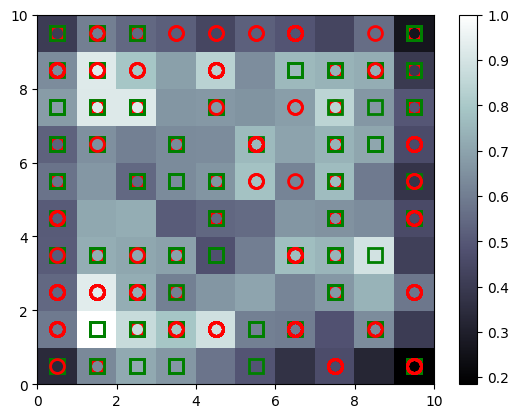

In [44]:
#Visualize the result
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [49]:
#Finding the frauds
mapping = som.win_map(X)
fraud_list = []
keys = [(1,5), (2,4), (2,3), (3,3), (6,2), (7,4), (8,8)]

for key in keys:
    if key in mapping:
        array = np.array(mapping[key])
        # Only include non-empty arrays
        if array.shape[0] > 0:  
            fraud_list.append(array)

if fraud_list:
    frauds = np.concatenate(fraud_list, axis=0)
    frauds = sc.inverse_transform(frauds)
else:
    # Handle the case where no frauds are found
    frauds = np.array([])  

print(frauds)

[[1.5803378e+07 1.0000000e+00 3.4920000e+01 5.0000000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 7.5000000e+00 1.0000000e+00 1.0000000e+00
  6.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0010000e+03]
 [1.5746995e+07 1.0000000e+00 3.4750000e+01 1.5000000e+01 2.0000000e+00
  1.2000000e+01 7.0000000e+00 5.3750000e+00 1.0000000e+00 1.0000000e+00
  9.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.3500000e+02]
 [1.5764444e+07 1.0000000e+00 3.9330000e+01 5.8750000e+00 2.0000000e+00
  1.3000000e+01 8.0000000e+00 1.0000000e+01 1.0000000e+00 1.0000000e+00
  1.4000000e+01 1.0000000e+00 2.0000000e+00 3.9900000e+02 1.0000000e+00]
 [1.5777893e+07 1.0000000e+00 3.7750000e+01 7.0000000e+00 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.1500000e+01 1.0000000e+00 1.0000000e+00
  7.0000000e+00 1.0000000e+00 2.0000000e+00 3.0000000e+02 6.0000000e+00]
 [1.5644446e+07 1.0000000e+00 3.3500000e+01 1.7500000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 4.5000000e+00 1.0000000e+00 1.

In [50]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15803378
15746995
15764444
15777893
15644446
15585892
15609356
15714087
15588123
15672432
15583680
15730793
15654859
15723827
15566495
15663194
15725028
15637891
15568878
15731989
15631693
15671534
15613699
15667460
15569394
15594651
15684722
15772329
15646082
15757188
15635598
15647191
15776545
15623369
15650591
15638610
15649160
15632789
15567834
15591035
15608804
15631267
15611189
